In [38]:
#Hello friends, I did this project as practice and the first project
#I know it may not seem like a good idea for a first project
#Please tell me your opinion and what is your suggestion to improve this code?

In [39]:
#Add required modules for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
#Reading the data file and displaying 3 lines of them
dataset = pd.read_csv("depression_data.csv")
dataset.head(3)



,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


In [41]:
#Checking the details of the file, including rows and columns, and checking the correctness of the data
dataset.shape
dataset.info()
dataset.describe()
dataset.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

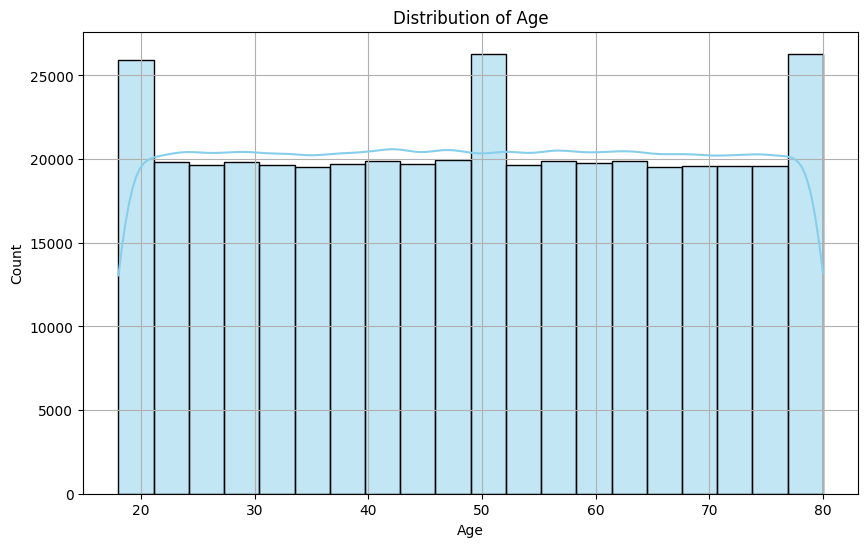

In [42]:
#In the first step, I came to the data analysis and took out the age range of the people and drew its graph
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=20, kde=True, color='skyblue' , edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

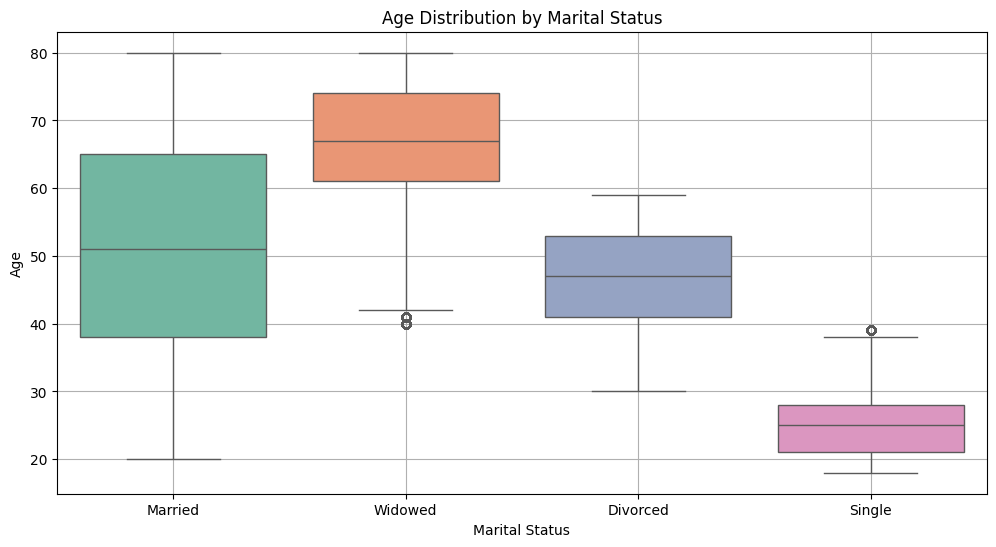

In [43]:
#In the next step, I examined the relationship between people's age and whether they were married or not and drew a diagram
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marital Status', y='Age', data=dataset,hue='Marital Status' ,palette='Set2')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.grid(True)
plt.show()


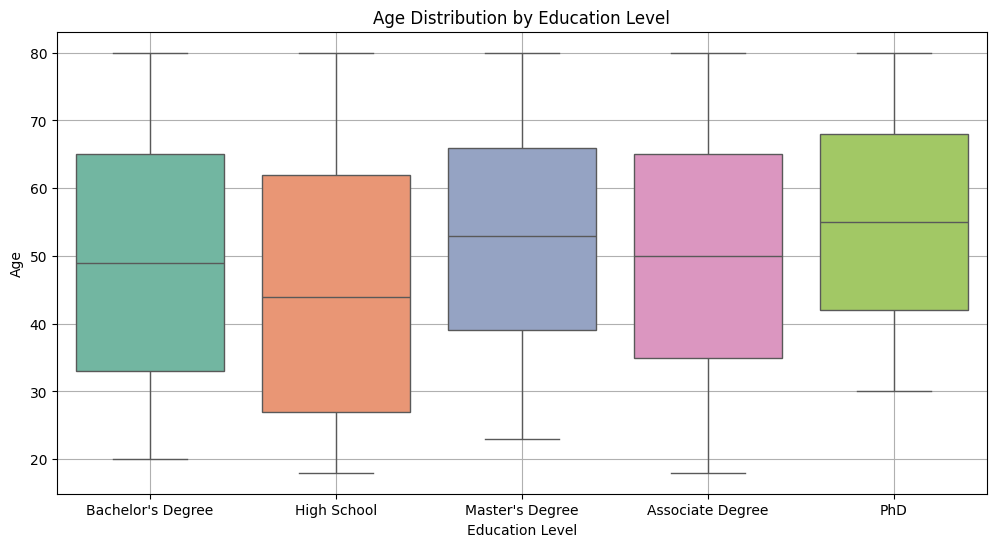

In [44]:
#In the next step, I compared the age of people with their educational qualifications
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Age', data=dataset, hue='Education Level',palette='Set2')
plt.title('Age Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.grid(True)
plt.show()


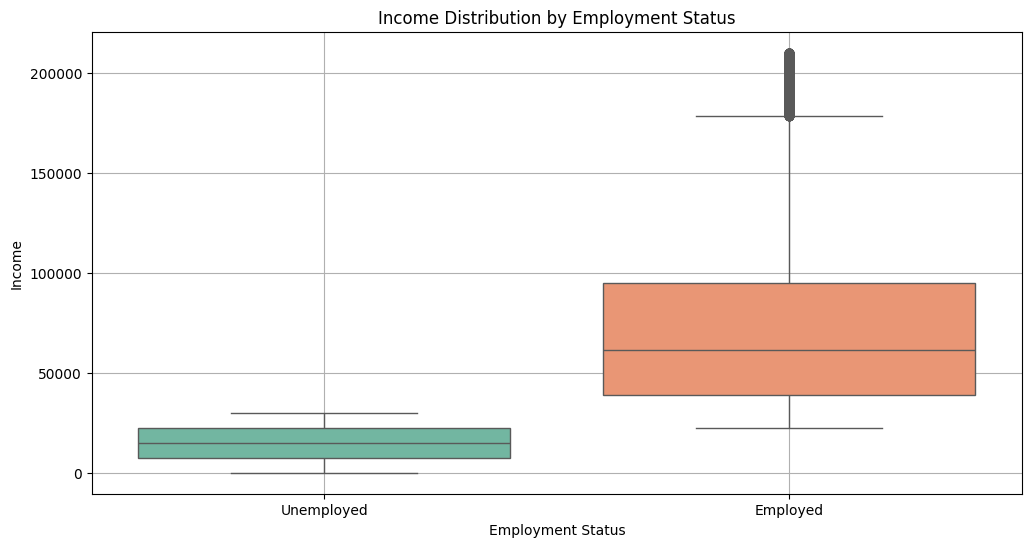

In [45]:
#I came to the next stage and measured people's employment with income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment Status', y='Income', data=dataset,hue='Employment Status' ,palette='Set2')
plt.title('Income Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Income')
plt.grid(True)
plt.show()


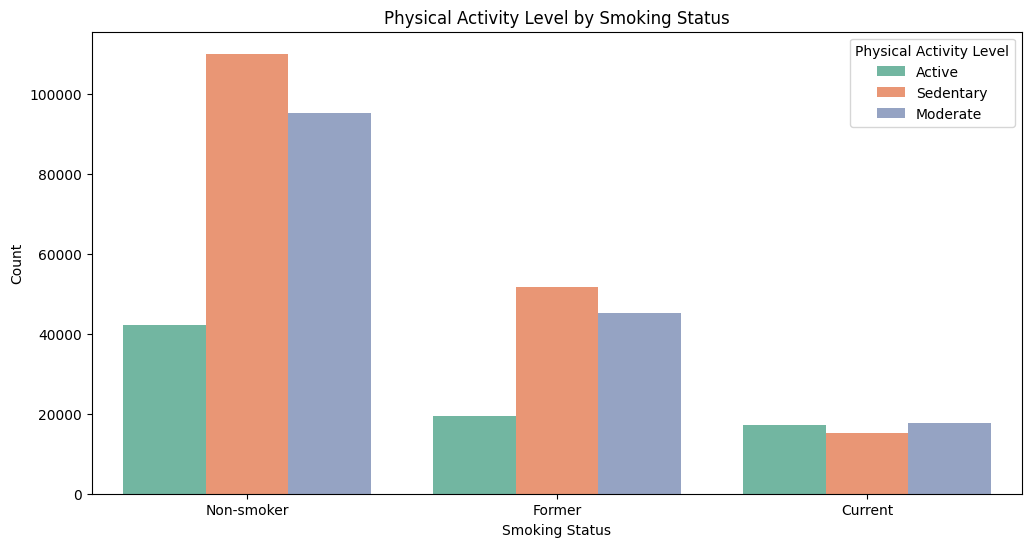

In [46]:
#In the next step, I measured people's smoking with their daily activity
plt.figure(figsize=(12, 6))
sns.countplot(x='Smoking Status', hue='Physical Activity Level', data=dataset, palette='Set2')
plt.title('Physical Activity Level by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


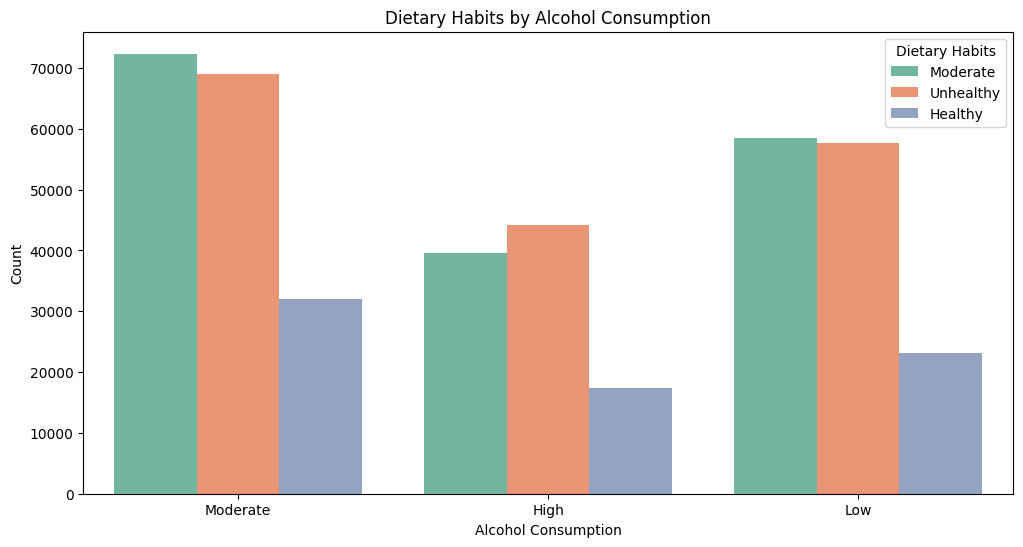

In [47]:
#Now it's time to compare alcohol consumption and bad eating habits
plt.figure(figsize=(12, 6))
sns.countplot(x='Alcohol Consumption', hue='Dietary Habits', data=dataset, palette='Set2')
plt.title('Dietary Habits by Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()


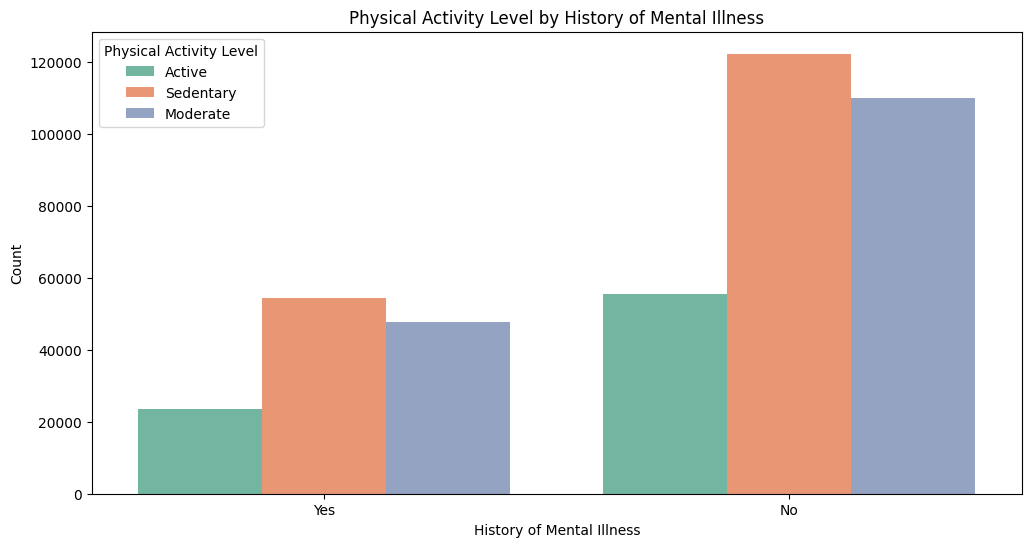

In [48]:
#Now I make a comparison between mental illnesses and daily activities
plt.figure(figsize=(12, 6))
sns.countplot(x='History of Mental Illness', hue='Physical Activity Level', data=dataset, palette='Set2')
plt.title('Physical Activity Level by History of Mental Illness')
plt.xlabel('History of Mental Illness')
plt.ylabel('Count')
plt.show()



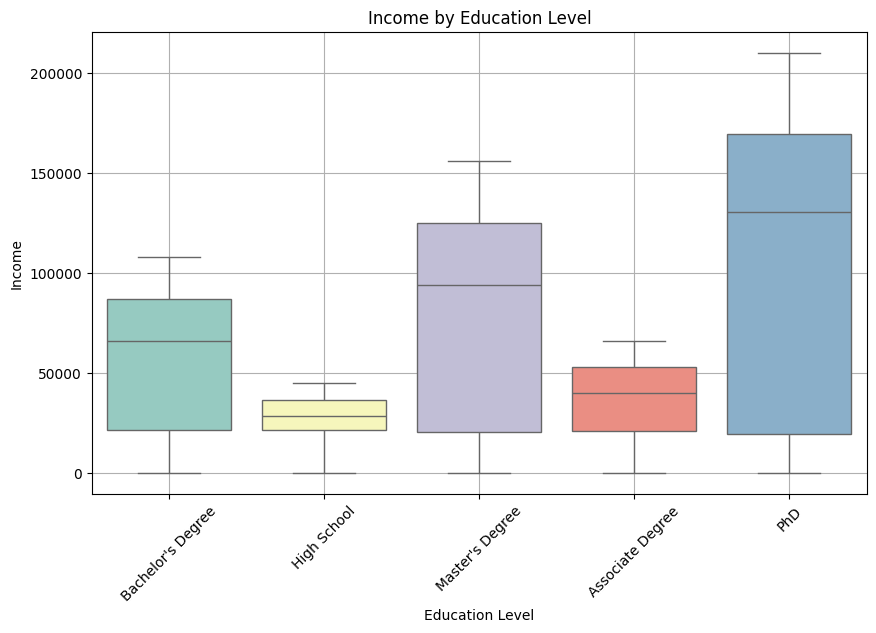

In [49]:
#The next step is to compare the level of education and income of people
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Income', data=dataset, hue='Education Level',palette='Set3')
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


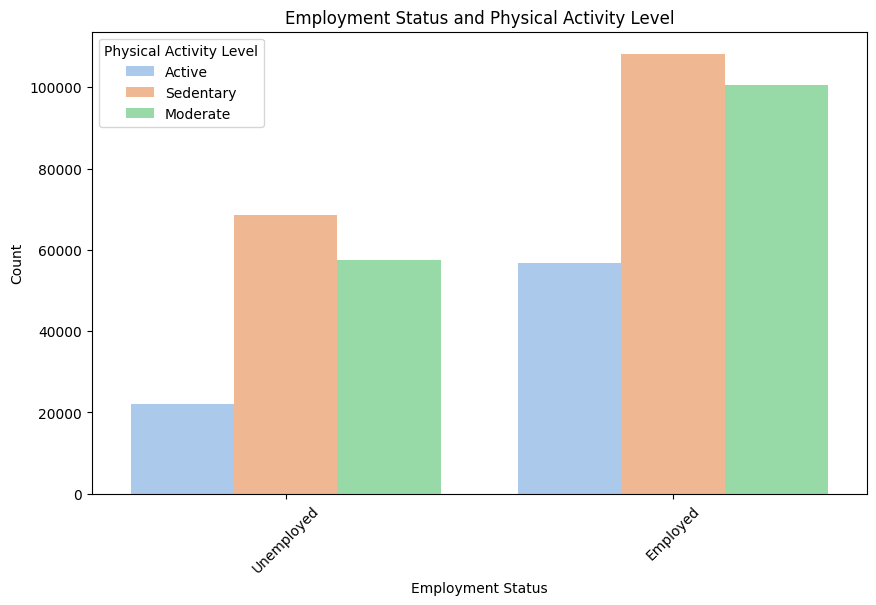

In [50]:
#In the next step, I will check people's activity by being employed
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment Status', hue='Physical Activity Level', data=dataset, palette='pastel')
plt.title('Employment Status and Physical Activity Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


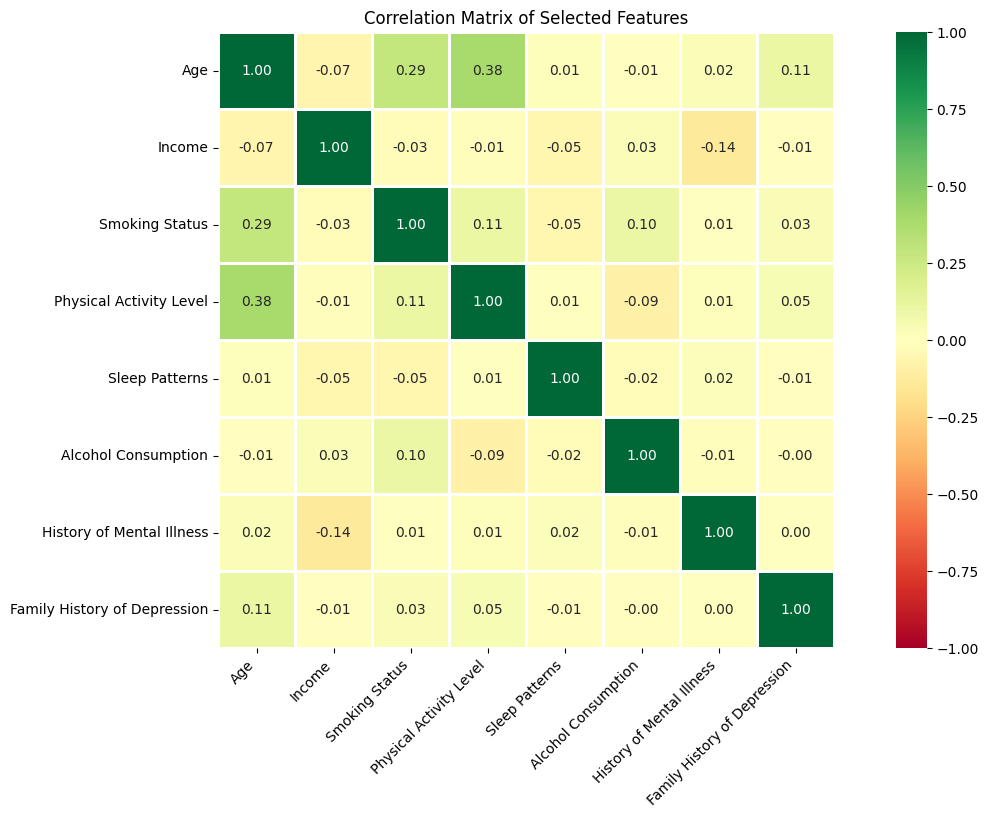

In [51]:

# Now we have to find a general view of the features,
#I think it can be useful to check the correlations,
#so we compare several features based on the correlation and we can easily understand the relationships between them.

#The most important part is to convert data that does not have numerical characteristics into numerical characteristics

dataset['Smoking Status'] = dataset['Smoking Status'].astype('category').cat.codes
dataset['Physical Activity Level'] = dataset['Physical Activity Level'].astype('category').cat.codes
dataset['Alcohol Consumption'] = dataset['Alcohol Consumption'].astype('category').cat.codes
dataset['Sleep Patterns'] = dataset['Sleep Patterns'].astype('category').cat.codes
dataset['History of Mental Illness'] = dataset['History of Mental Illness'].astype('category').cat.codes
dataset['Family History of Depression'] = dataset['Family History of Depression'].astype('category').cat.codes



#We specify the columns we want in the correlation chart
selected_columns = ['Age', 'Income', 'Smoking Status', 'Physical Activity Level', 
                    'Sleep Patterns', 'Alcohol Consumption','History of Mental Illness','Family History of Depression']


correlation_matrix = dataset[selected_columns].corr()


plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', vmin=-1, vmax=1, 
            linewidths=1, cbar_kws={"shrink": 1}, square=True)


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Matrix of Selected Features')
plt.show()

  


In [52]:



# Now I will define depression with important features


dataset['History of Mental Illness'] = dataset['History of Mental Illness'].astype('category').cat.codes
dataset['Family History of Depression'] = dataset['Family History of Depression'].astype('category').cat.codes
dataset['Sleep Patterns'] = dataset['Sleep Patterns'].astype('category').cat.codes
dataset['Dietary Habits'] = dataset['Dietary Habits'].astype('category').cat.codes

print(dataset[['History of Mental Illness', 'Family History of Depression', 'Sleep Patterns', 'Dietary Habits']].head(10))

#Don't forget to convert non-numeric features to numeric ones
#insert the new columns for depression
dataset['Depression Status'] = (
    (dataset['History of Mental Illness'] == 1).astype(int) +
    (dataset['Family History of Depression'] == 1).astype(int) +
    (dataset['Sleep Patterns'] == 1).astype(int) +
    (dataset['Dietary Habits'] == 1).astype(int)
) >= 2     #And finally, this condition is checked and according to this condition F


dataset['Depression Status'] = dataset['Depression Status'].astype(int)
print(dataset['Depression Status'].value_counts())




   History of Mental Illness  Family History of Depression  Sleep Patterns  \
0                          1                             1               0   
1                          1                             0               0   
2                          0                             1               1   
3                          0                             0               2   
4                          1                             1               0   
5                          0                             0               0   
6                          0                             0               2   
7                          0                             0               1   
8                          0                             0               1   
9                          1                             0               2   

   Dietary Habits  
0               1  
1               2  
2               2  
3               1  
4               1  
5               2  
6

In [53]:

#And finally, I used the decision tree to learn


X = dataset[['Age', 'Income', 'Smoking Status', 'Physical Activity Level', 
             'Sleep Patterns', 'Alcohol Consumption','Family History of Depression','History of Mental Illness']]
y = dataset['Depression Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.79
Confusion Matrix:
[[45017  8727]
 [ 8606 20404]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     53744
           1       0.70      0.70      0.70     29010

    accuracy                           0.79     82754
   macro avg       0.77      0.77      0.77     82754
weighted avg       0.79      0.79      0.79     82754

